In [3]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Load Data

In [131]:
path = "sources/all_sephora_products.csv"
sephora_prod = pd.read_csv(path, delimiter=',', quotechar='"')
sephora_prod = pd.DataFrame(sephora_prod)
sephora_prod

,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0


## Data Cleaning and Manipulation

I changed the 'Label' column to 'category' to make more sense and keep the same format as other columns.

In [132]:
sephora_prod = sephora_prod.rename(columns={'Label' : 'category',
                                            'rank' : 'rating',
                                           'Combination' : 'combination',
                                           'Dry' : 'dry',
                                           'Normal' : 'normal',
                                           'Oily' : 'oily',
                                           'Sensitive' : 'sensitive'})
sephora_prod.columns

Index(['category', 'brand', 'name', 'price', 'rating', 'ingredients',
       'combination', 'dry', 'normal', 'oily', 'sensitive'],
      dtype='object')

#### Check for Duplicates

In [8]:
sephora_prod.name.value_counts()

name
Sport Continuous Spray SPF 50 - Guava Mango                              1
Mineral Moisture Defense Body Broad Spectrum SPF 50 UVA-UVB Sunscreen    1
ER+ Radical Recovery After-Sun Lotion                                    1
Flow-Thru Radiant Transclucent Powder SPF 20                             1
Daily Protection Broad Spectrum SPF 50 Sunscreen                         1
                                                                        ..
The Moisturizing Soft Cream                                              1
Your Skin But Better™ CC+™ Cream with SPF 50+                            1
The Water Cream                                                          1
Lala Retro™ Whipped Cream                                                1
Virgin Marula Luxury Facial Oil                                          1
Name: count, Length: 1472, dtype: int64

In [9]:
duplicates = sephora_prod.duplicated()
print(duplicates)
# or
sephora_prod[duplicates]

0       False
1       False
2       False
3       False
4       False
        ...  
1467    False
1468    False
1469    False
1470    False
1471    False
Length: 1472, dtype: bool


,category,brand,name,price,rating,ingredients,combination,dry,normal,oily,sensitive


No duplicates!




#### Dropping nulls

In [10]:
# Check for null values in each column
print(sephora_prod.isnull().sum())

# Locate rows with null values (if any)
#rows_with_nulls = sephora_prod[sephora_prod.isnull().any(axis=1)]
#print(rows_with_nulls)

category       0
brand          0
name           0
price          0
rating         0
ingredients    0
combination    0
dry            0
normal         0
oily           0
sensitive      0
dtype: int64


In [11]:
# Drop nulls
sephora_nona = sephora_prod.dropna()
sephora_nona.describe()
# this dataset has no missing values

,price,rating,combination,dry,normal,oily,sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


A notable problem though:

Row 16 is a bundle of multiple Drunk Elephant products. The products in this bundle are not individually rated but all together...

The products within the bundle are also listed in the products list.

In [91]:
sephora_prod[sephora_prod.index==15]

category           brand          name  price  rating  \
15  Moisturizer  DRUNK ELEPHANT  The Littles™     90     4.4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

## Let's Start Some Simple Exploration!

In [7]:
sephora_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   brand        1472 non-null   object 
 2   name         1472 non-null   object 
 3   price        1472 non-null   int64  
 4   rank         1472 non-null   float64
 5   ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [7]:
list(sephora_prod.columns)

['Label',
 'brand',
 'name',
 'price',
 'rank',
 'ingredients',
 'Combination',
 'Dry',
 'Normal',
 'Oily',
 'Sensitive']

1472 rows x 11 columns

Blanks: 0

Data types: 4 objects (non-numeric), 6 integers, 1 float (rank)

In [8]:
sephora_prod.describe()

,price,rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


No missing datae!

<b><u>Price</u></b>

Mean price: $55.58

Std price: 45

68% fell between 10.58 - 100.58. This is a very wide range. When the mean > median this indicates a right positive skewness meaning there must be outliers that are in the higher price end that is affecting the mean and std.
In short: most of the prices are lower than 42.5 with a few that are much higher. Which makes sense because the max price of a product in the table is $370.

**In short most of the prices are below $42.5 with a few really expensive products.**

<b><u>Rating</u></b>

Mean rating: 4.15

Std rating: 0.63

68% fell between (3.52 - 4.78)

95% fell between (2.98 - 5.41)

99% fell between (2.26 - 6.04)

Since the max rating is 5, and the median is 4.3, when the median > mean this indicates a left negative skewness meaning there are outliers in the lower ratings affecting the mean and std. 

**In short: most of the ratings are positive higher than 4.3 with a few really low ones.**



In [36]:
print('\033[1mMean\033[0m')
print(sephora_prod.mean(numeric_only=True))
print('\n\033[1mMedian\033[0m')
print(sephora_prod.median(numeric_only=True))
print('\n\033[1mMax\033[0m')
print(sephora_prod.max(numeric_only=True))

Mean
price          55.584239
rating          4.153261
combination     0.656250
dry             0.614130
normal          0.652174
oily            0.607337
sensitive       0.513587
dtype: float64

Median
price          42.5
rating          4.3
combination     1.0
dry             1.0
normal          1.0
oily            1.0
sensitive       1.0
dtype: float64

Max
price          370.0
rating           5.0
combination      1.0
dry              1.0
normal           1.0
oily             1.0
sensitive        1.0
dtype: float64


Pairwise correlation between all numerical value columns in the data.

The closer to 1, the stronger the correlation between these variables.

Take this with a grain of salt since five of the columns are pretty strongly correlated since they are included in a lot of products together.

Rating and price have a slightly negative correlation. Meaning when one goes up the other goes down, but the value is too small to be considered significant.

In [13]:
sephora_prod.corr(numeric_only=True)

,price,rating,combination,dry,normal,oily,sensitive
price,1.000000,-0.025215,0.012575,0.065525,0.049230,0.003978,0.007621
rating,-0.025215,1.000000,0.036904,0.026982,0.051926,0.021041,0.015946
combination,0.012575,0.036904,1.000000,0.830784,0.927966,0.882528,0.689316
dry,0.065525,0.026982,0.830784,1.000000,0.874436,0.745767,0.722367
normal,0.049230,0.051926,0.927966,0.874436,1.000000,0.835227,0.713320
oily,0.003978,0.021041,0.882528,0.745767,0.835227,1.000000,0.648097
sensitive,0.007621,0.015946,0.689316,0.722367,0.713320,0.648097,1.000000


## Indexing and Selecting

#### Getting all the columns

In [ ]:
sephora_prod.columns

#### Getting just one column

In [ ]:
sephora_prod['Label']
# or
sephora_prod.Label

#### Getting more than one column

In [ ]:
sephora_prod[['category', 'name']]

In [ ]:
# specific rows
sephora_prod.loc[1:30]
sephora_prod.loc[1:30, ['Label', 'name']]

# range of rows
sephora_prod.loc[:, 'Label':'name']

In [14]:
#sephora_prod.loc[:, ['brand', 'ingredients']]

pd.set_option('display.max_colwidth', None)

print(sephora_prod.loc[:, 'brand':'ingredients'])

#sephora_prod.loc[15, 'ingredients']
print(sephora_prod.loc[15])

sephora_prod.loc[sephora_prod.name == 'Beste']

                              brand  \
0                            LA MER   
1                             SK-II   
2                    DRUNK ELEPHANT   
3                            LA MER   
4                      IT COSMETICS   
...                             ...   
1467                         KORRES   
1468                KATE SOMERVILLE   
1469                  VITA LIBERATA   
1470  ST. TROPEZ TANNING ESSENTIALS   
1471                     DERMAFLASH   

                                                                               name  \
0                                                                   Crème de la Mer   
1                                                          Facial Treatment Essence   
2                                                        Protini™ Polypeptide Cream   
3                                                       The Moisturizing Soft Cream   
4                                     Your Skin But Better™ CC+™ Cream with SPF 50+   
...      

,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive


#### Vita Liberata

Need to look for products of "VITA LIBERATA" Do they only sell sunscreen or something?

In [90]:
#sephora_prod.loc[sephora_prod.brand == 'VITA LIBERATA'] what is the difference between these two methods anyways?
sephora_prod[sephora_prod.brand == 'VITA LIBERATA']

,category,brand,name,price,rating,ingredients,combination,dry,normal,oily,sensitive
1463,Sun protect,VITA LIBERATA,Passionflower & Argan Dry Oil Broad Spectrum SPF 50,45,4.2,"Prunus Amygdalus Dulcis (Sweet Almond) Oil*, Cyclopentasiloxane, Passiflora incarnata (Passionfruit) oil, Argania Spinosa (Argan) Oil*. *Organic.",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya Birrea Seed Oil, Mica, Cymbopogon flexuosus (Lemongrass) oil, Cucumis Sativus (Cucumber) Extract, Citrus aurantium amara (Bitter orange) flower oil, Dimethyl isosorbide, Sodium Benzoate, Potassium Sorbate, Caramel, Tin oxide, CI 77491 (Iron oxides), Cocos Nucifera (Coconut) Oil, Gardenia Taitensis Flower Extract, Sorbitol, Sodium Citrate, Silica.",0,0,0,0,0


Yup, they only sell two products, both sunscreens. 

No wonder they have nulls for the mean price of every other product category.

#### Creating smaller tables

In [ ]:
# looking for products > $100, and print out just the four columns
subprod = sephora_prod.loc[sephora_prod.price > 100, ['Label', 'brand', 'name','price']]
subprod

#### Conditions within the table

In [ ]:
# looking for products over $200 from the last subtable
subprod.loc[(sephora_prod.price > 200) & (sephora_prod.Label != "Moisturizer")]

In [ ]:
# looking for the most expensive product in the list (max price)
# since price is the only numeric value
sephora_prod.max(numeric_only=True)

# printing out the most expensive item from the list
sephora_prod.loc[sephora_prod['price'].idxmax()]

#### Grouping by values

In [ ]:
sephora_prod.groupby('brand').mean(numeric_only=True)
# like in SQL

In [ ]:
subprod = sephora_prod[['brand', 'price']]
subprod.groupby('brand').median('price')

#### Groups and subgroups

To find the average price and rating for each brand's group of products.

In [ ]:
sephora_prod.groupby(['brand', 'Label']).mean(numeric_only=True)

## Pivot Tables

In [19]:
sub1 = sephora_prod.pivot_table('price', index='brand', columns='category', aggfunc='mean')
sub1

category,Cleanser,Eye cream,Face Mask,Moisturizer,Sun protect,Treatment
brand,,,,,,
ALGENIST,33.666667,72.250000,55.000000,85.400000,42.0,80.636364
AMOREPACIFIC,55.000000,146.666667,87.333333,116.666667,80.4,130.000000
ANTHONY,NaN,38.000000,24.000000,NaN,34.0,NaN
APIVITA,NaN,30.000000,NaN,NaN,NaN,NaN
BAREMINERALS,30.000000,35.000000,NaN,28.500000,NaN,58.000000
...,...,...,...,...,...,...
VITA LIBERATA,NaN,NaN,NaN,NaN,49.5,NaN
VOLITION BEAUTY,38.000000,52.000000,60.000000,NaN,35.0,62.000000
WANDER BEAUTY,NaN,25.000000,NaN,NaN,NaN,NaN


In [20]:
sephora_prod.pivot_table(index='brand', columns='category', aggfunc={'price':'mean', 'rating':'mean'})

price                                                 \
category              Cleanser   Eye cream  Face Mask Moisturizer Sun protect   
brand                                                                           
ALGENIST             33.666667   72.250000  55.000000   85.400000        42.0   
AMOREPACIFIC         55.000000  146.666667  87.333333  116.666667        80.4   
ANTHONY                    NaN   38.000000  24.000000         NaN        34.0   
APIVITA                    NaN   30.000000        NaN         NaN         NaN   
BAREMINERALS         30.000000   35.000000        NaN   28.500000         NaN   
...                        ...         ...        ...         ...         ...   
VITA LIBERATA              NaN         NaN        NaN         NaN        49.5   
VOLITION BEAUTY      38.000000   52.000000  60.000000         NaN        35.0   
WANDER BEAUTY              NaN   25.000000        NaN         NaN         NaN   
YOUTH TO THE PEOPLE  36.000000   35.000000  44.000000   50.000000         NaN   
YVES SAINT LAURENT         NaN   73.000000        NaN         NaN         NaN   

                                   rating                                  \
category              Treatment  Cleanser Eye cream Face Mask Moisturizer   
brand                                                                       
ALGENIST              80.636364  4.366667      3.75  2.700000    4.280000   
AMOREPACIFIC         130.000000  4.600000      4.40  4.366667    4.266667   
ANTHONY                     NaN       NaN      4.30  4.400000         NaN   
APIVITA                     NaN       NaN      4.00       NaN         NaN   
BAREMINERALS          58.000000  4.600000      3.85       NaN    4.000000   
...                         ...       ...       ...       ...         ...   
VITA LIBERATA               NaN       NaN       NaN       NaN         NaN   
VOLITION BEAUTY       62.000000  4.600000      3.90  4.700000         NaN   
WANDER BEAUTY               NaN       NaN      4.45       NaN         NaN   
YOUTH TO THE PEOPLE   62.000000  4.400000      4.00  4.400000    4.600000   
YVES SAINT LAURENT          NaN       NaN      3.40       NaN         NaN   

                                           
category            Sun protect Treatment  
brand                                      
ALGENIST                   4.10  4.190909  
AMOREPACIFIC               3.86  4.300000  
ANTHONY                    4.00       NaN  
APIVITA                     NaN       NaN  
BAREMINERALS                NaN  4.400000  
...                         ...       ...  
VITA LIBERATA              3.85       NaN  
VOLITION BEAUTY            4.20  4.700000  
WANDER BEAUTY               NaN       NaN  
YOUTH TO THE PEOPLE         NaN  3.900000  
YVES SAINT LAURENT          NaN       NaN  

[116 rows x 12 columns]

In [ ]:
sephora_prod.pivot_table('price', index='brand', columns='category', aggfunc='mean', margins=True)
# margins just includes the total for columns as well

Let's find products that have ratings of 0.

,category,brand,name,price,rating,ingredients,combination,dry,normal,oily,sensitive
97,Moisturizer,LA MER,The Concentrate Mini,190,0.0,"Cyclopentasiloxane, Algae (Seaweed) Extract, Glycerin, Dimethicone, Polysilicone-11, Isononyl Isononanoate, Dimethicone/Peg-10/15 Crosspolymer, Sesamum Indicum (Sesame) Seed Oil, Medicago Sativa (Alfalfa) Seed Powder, Helianthus Annuus (Sunflower) Seedcake, Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal, Eucalyptus Globulus (Eucalyptus) Leaf Oil, Sodium Gluconate, Copper Gluconate, Calcium Gluconate, Magnesium Gluconate, Zinc Gluconate, Tocopheryl Succinate, Niacin, Sesamum Indicum (Sesame) Seed Powder, Water, Dimethicone Crosspolymer, Helichrysum Arenarium (Everlasting) Extract, Laminaria Ochroleuca Extract, Triticum Vulgare (Wheat) Flour Lipids, Citrus Aurantifolia (Lime) Peel Extract, Crithmum Maritimum Extract, Alteromonas Ferment Extract, Chlorella Vulgaris Extract, Yeast Extract/Faex/Extrait De Levure, Cholesterol, Linoleic Acid, Tetraacetylphytosphingosine, Caprylic/Capric Triglyceride, Rosmarinus Officinalis (Rosemary) Leaf Oil, Ocimum Basilicum (Basil) Oil, Lavandula Angustifolia (Lavender) Oil, Lavandula Hybrida (Lavandin) Oil, Dipropylene Glycol, Sodium Citrate, Limonene, Linalool, Phenoxyethanol",0,0,0,0,0
116,Moisturizer,SK-II,Facial Treatment Essence Karan Singh Limited Edition,229,0.0,"Galactomyces Ferment Filtrate*, Butylene Glycol, Pentylene Glycol, Water, Sodium Benzoate, Methylparaben, Sorbic Acid. *PITERA™.",0,0,0,0,0
279,Moisturizer,CLINIQUE,Limited Edition Dramatically Different Moisturizing Lotion+™,39,0.0,"Water, Mineral Oil/Paraffinum Liquidum/Huile Minerale, Glycerin, Petrolatum, Stearic Acid, Glyceryl Stearate, Sesamum Indicum (Sesame) Oil, Urea, Lanolin Alcohol, Triethanolamine, Hordeum Vulgare (Barley) Extract/Extrait D'Orge, Cucumis Sativus (Cucumber) Fruit Extract, Helianthus Annuus (Sunflower) Seedcake, Propylene Glycol Dicaprate, Sodium Hyaluronate, Butylene Glycol, Pentylene Glycol, Trisodium Edta, Phenoxyethanol, Yellow 6 (Ci 15985), Yellow 5 (Ci 19140), Red 33 (Ci 17200).",1,1,0,0,0
365,Cleanser,ESTÉE LAUDER,Nutritious Radiant Vitality Energy Lotion,58,0.0,"Nutritious Vitality8 Egy Lot Int M Division: El (Estee Lauder)Ingredients: Water , Alcohol Denat. , Glycerin , Dipropylene Glycol , Propanediol , Trehalose , Citrullus Vulgaris (Watermelon) Fruit Extract , Lens Esculenta (Lentil) Fruit Extract , Pyrus Malus (Apple) Fruit Extract , Cucumis Sativus (Cucumber) Fruit Extract , Panax Ginseng (Ginseng) Root Extract , Vaccinium Macrocarpon (Cranberry) Fruit Extract , Vaccinium Angustifolium (Blueberry) Fruit Extract , Lycium Chinense (Wolfberry) Fruit Extract , Punica Granatum (Pomegranate) Extract , Acetyl Glucosamine , Sodium Pca , Sapindus Mukurossi Fruit Extract , Algae Extract , Garcinia Mangostana Peel Extract , Caesalpinia Spinosa Gum , Ergothioneine , Caffeine , Yeast Extract/Faex/Extrait De Levure , Sodium Lactate , Sodium Hyaluronate , Peg-8 , Ppg-6-Decyltetradeceth-30 , Butylene Glycol , Tromethamine , Tocopheryl Acetate , Tetrahexyldecyl Ascorbate , Carbomer , Citric Acid , Fragrance , Trisodium Hedta , Phenoxyethanol , Yellow 6 (Ci 15985) , Red 4 (Ci 14700)",0,0,0,0,0
389,Cleanser,FRESH,Rose Deep Hydration Toner Mini,25,0.0,"Water, Glycerin, Butylene Glycol, Rosa Centifolia Flower, Rosa Damascena Flower Water, Rosa Multiflora Fruit Extract, Angelica Keiskei Extract, Rosa Damascena Flower Oil, Sodium Hyaluronate, PEG-150, PPG-26-Buteth-26, PEG-40 Hydroge- nated Castor Oil, Sodium Citrate, Xanthan Gum, Citric Acid, BHT, Parfum (Fragrance), Phenoxyethanol, Citronellol, Geraniol.",0,0,0,0,0
452,Cleanser,MURAD,Clarifying Toner,24,0.0,"Water, Witch Hazel Water, Butylene Glycol, Alcohol Denat., PPG-5-Ceteth-20, Carrageenan Extract, Cucumber Fruit Extract, Lemon Fruit Extract, Calendula Officinalis Flower Extract, Lecithin, Tocopherol, Magnesium Ascorbyl Phosphate, Allantoin, Palmitoyl Hydroxypropyltrimonium Amylopectin/Glycerin Crosspolymer, Grape Seed E

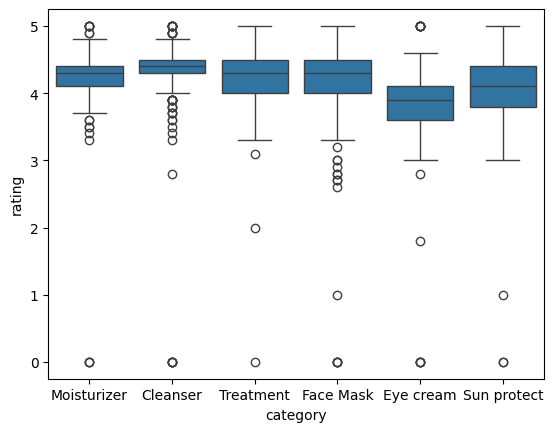

In [22]:
subprod = sephora_prod.groupby('brand').mean(numeric_only=True)
#print(subprod)
sns.boxplot(x='category', y='rating', data=sephora_prod)
#sns.violinplot(x='price', y='brand', data=sephora_prod, density_norm='width', cut=0)
df = sephora_prod[sephora_prod.rating == 0]
df

Notes
1. A lot of the products were assumingly taken off sephora, probably no one bought them, bc no one left reviews
2. Some products were left probably because they have reviews now
3. A lot of products are not even correctly categorized. A lot of toners and serums are labeled as "Cleansers"
4. Note: all the products have gotten more expensive
5. There are some typos in the ingredients list

Let's see what products are listed in the Cleanser category.

In [23]:
sephora_prod.loc[sephora_prod.category == 'Cleanser']

,category,brand,name,price,rating,ingredients,combination,dry,normal,oily,sensitive
298,Cleanser,DRUNK ELEPHANT,T.L.C. Sukari Babyfacial™,80,4.5,"Water, Glycolic Acid, Hydroxyethyl Acrylate/Sodium Acryloyldimethyl Taurate Copolymer, Glycerin, Sodium Hydroxide, Salicylic Acid, Aloe Barbadensis Leaf Extract, Camellia Oleifera Leaf Extract, Lactobacillus/Pumpkin Ferment Extract, Lactobacillus/Punica Granatum Fruit Ferment Extract, Opuntia Ficus-Indica Extract, Pyrus Malus (Apple) Fruit Extract, Silybum Marianum Seed Extract, Saccharomyces Cerevisiae Extract, Vitis Vinifera (Grape) Juice Extract, Camellia Sinensis Leaf Powder, Cicer Arietinum Seed Powder, Sclerocarya Birrea Seed Oil, Passiflora Edulis Seed Oil, Leuconostoc/Radish Root Ferment Filtrate, Sodium Hyaluronate Crosspolymer, Sodium PCA, Allantoin, Dipotassium Glycyrrhizate, Dextrin, Polydextrose, Sorbitan Isostearate, Amylopectin, Niacinamide, Phytosphingosine, Lactic Acid, Propanediol, Citric Acid, Titanium Dioxide, Trisodium Ethylenediamine Disuccinate, Polysorbate 60, Caprylyl Glycol, Chlorphenesin, Phenoxyethanol.",1,1,1,1,0
299,Cleanser,DRUNK ELEPHANT,T.L.C. Framboos™ Glycolic Night Serum,90,4.3,"Water, Glycolic Acid, Butylene Glycol, Glycerin, Sodium Hydroxide, Salicylic Acid, Lactic Acid, Citric Acid, Vitis Vinifera (Grape) Juice Extract, Aloe Barbadensis Leaf Juice, Opuntia Ficus-Indica Extract, Aesculus Hippocastanum (Horse Chestnut) Seed Extract, Camellia Sinensis Leaf Extract, Rubus Idaeus (Raspberry) Fruit Extract, Saccharomyces Cerevisiae Extract, Buddleja Davidii Meristem Cell Culture, Sclerocarya Birrea Seed Oil, Sodium Hyaluronate Crosspolymer, Allantoin, Hydroxyethylcellulose, Galactoarabinan, Propanediol, Disodium EDTA, Xanthan Gum, Hexylene Glycol, Phenoxyethanol, Caprylyl Glycol, Ethylhexylglycerin, Sodium Nitrate, Potassium Sorbate, Pentylene Glycol, Sodium Benzoate.",1,1,1,1,0
300,Cleanser,FRESH,Soy Face Cleanser,38,4.4,"Water, Coco-Glucoside, Glycerin, Butylene Glycol, PEG-7 GlycerylCocoate, Xanthan Gum, Soybean Oil, Sunflower Seed Oil, Borago Officinalis Seed Oil, Aloe Barbadensis Leaf Juice, Cucumber Fruit Extract, Rosa Damascena Extract, Rosa Damascena Flower Water, Centaurea Cyanus Flower Extract, Soybean Sterols, Panax Ginseng Root Extract, Rosa Damascena Flower Oil, Mallow Flower Extract, Tocopherol, Ascorbyl Palmitate, PEG-120Methyl Glucose Dioleate, PEG-40Hydrogenated Castor Oil, Caprylyl Glycol, Polysorbate20, Caprylic/Capric Triglyceride, Silica, Benzoic Acid, Disodium EDTA, Citric Acid, Behenyl Alcohol, Glyceryl Stearate, Lecithin, Pentylene Glycol, Hydrolyzed Soy Protein, Caramel, Sodium Benzoate, Potassium Sorbate, Phenoxyethanol.",0,0,0,0,0
301,Cleanser,FARMACY,Green Clean Makeup Meltaway Cleansing Balm with Echinacea GreenEnvy™,34,4.6,"Cetyl Ethylhexanoate, Caprylic/Capric Triglyceride, Peg-20 Glyceryl Triisostearate, Peg-10 Isostearate, Polyethylene, Phenoxyethanol, Sorbitan Sesquioleate, Citrus Aurantifolia (Lime) Oil, Citrus Aurantium Bergamia (Bergamot) Fruit Oil, Melia Azadirachta Leaf Extract, Melia Azadirachta Flower Extract, Amino Esters-1, Citrus Aurantium Dulcis (Orange) Peel Oil, Amber Powder, Cananga Odorata Flower Oil, Coccinia Indica Fruit Extract, Solanum Melongena (Eggplant) Fruit Extract, Curcuma Longa (Turmeric) Root Extract, Ocimum Sanctum Leaf Extract, Corallina Officinalis Extract, Moringa Oleifera Seed Oil, Zingiber Officinale (Ginger) Root Oil, Helianthus Annuus (Sunflower) Seed Oil, Water, Glycerin, Butylene Glycol, Echinacea Purpurea Root Extract, Carica Papaya (Papaya) Fruit Extract, Moringa Pterygosperma Seed Extract, Disodium Phosphate, Citric Acid.",1,1,1,1,1
302,Cleanser,PHILOSOPHY,Purity Made Simple Cleanser,24,4.5,"Water, Sodium Lauroamphoacetate, Sodium Trideceth Sulfate, Limnanthes Alba (Meadowfoam) Seed Oil, Coco-Glucoside, Coconut Alcohol, Peg-120 Methyl Glucose Dioleate, Glycerin, Carbomer, Isopropyl Alcohol, Polysorbate 20, Citric Acid, Imidazolidinyl Urea, Methylparaben, Aniba Rosaeodora (Rosewo

In [47]:
brand_count = sephora_prod.groupby('brand').size().to_frame(name='count').reset_index()
brand_count.set_index('brand',  append=False) 
# optional: inplace=True

,count
brand,
ALGENIST,27
AMOREPACIFIC,21
ANTHONY,3
APIVITA,1
BAREMINERALS,6
...,...
VITA LIBERATA,2
VOLITION BEAUTY,5
WANDER BEAUTY,2


## Descriptive Stats and General Analysis

#### 1. What is the average price of products in each category?

In [7]:
mean_cat_price = sephora_prod.pivot_table('price', index='category', aggfunc='mean')
mean_cat_price.round(2)

,price
category,
Cleanser,32.60
Eye cream,63.60
Face Mask,42.62
Moisturizer,69.09
Sun protect,45.91
Treatment,79.18


In [6]:
sephora_prod.pivot_table('price', index='category', aggfunc='median')

,price
category,
Cleanser,28.0
Eye cream,52.0
Face Mask,36.0
Moisturizer,50.0
Sun protect,38.0
Treatment,64.5


#### 2. What is the distribution of ratings across each category?

In [9]:
mean_cat_rating = sephora_prod.pivot_table('rating', index='category', aggfunc='mean')
mean_cat_rating.round(2)

,rating
category,
Cleanser,4.31
Eye cream,3.81
Face Mask,4.17
Moisturizer,4.24
Sun protect,4.05
Treatment,4.22


In [8]:
sephora_prod.pivot_table('rating', index='category', aggfunc='median')

,rating
category,
Cleanser,4.4
Eye cream,3.9
Face Mask,4.3
Moisturizer,4.3
Sun protect,4.1
Treatment,4.3


#### 3. What is the price range for products in each category?

In [145]:
cat_price_range = sephora_prod.groupby('category')['price'].agg(['min', 'max', 'mean', 'median', lambda x: x.mode()[0]])
cat_price_range

,min,max,mean,median,<lambda_0>
category,,,,,
Cleanser,4,95,32.601423,28.0,28
Eye cream,5,260,63.602871,52.0,38
Face Mask,3,250,42.624060,36.0,6
Moisturizer,4,325,69.087248,50.0,39
Sun protect,18,260,45.905882,38.0,36
Treatment,18,370,79.177419,64.5,95


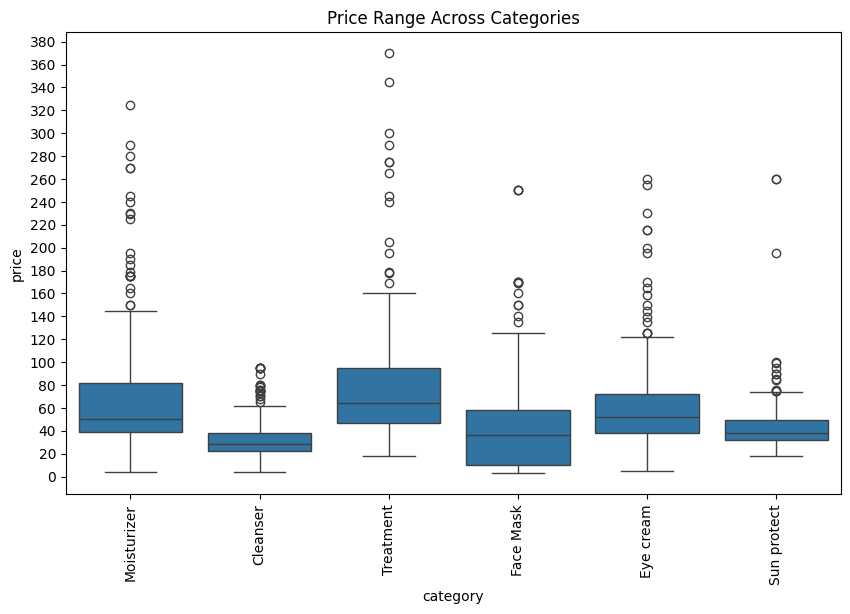

In [63]:
plt.figure(figsize=(10,6))
sns.boxplot(data=sephora_prod, x='category', y='price')
plt.title('Price Range Across Categories')
plt.xticks(rotation=90)
plt.yticks(range(0,400,20))
plt.show()

#### 4. Which brands have the highest rated products on average?

In [69]:
brand_avg_rating = sephora_prod.groupby('brand')['rating'].mean()
sorted_brand_rating = brand_avg_rating.sort_values(ascending=False)
sorted_brand_rating.head(20)

brand
CLARISONIC          5.000000
NURSE JAMIE         5.000000
BIOEFFECT           4.900000
GO-TO               4.850000
PRIVATE DOCTOR      4.800000
NUFACE              4.700000
MOON JUICE          4.700000
SAND & SKY          4.700000
BLACK UP            4.700000
ERNO LASZLO         4.628571
SON & PARK          4.600000
JACK BLACK          4.600000
TOM FORD            4.600000
NEOGEN DERMALOGY    4.566667
KOH GEN DO          4.550000
SATURDAY SKIN       4.528571
LANCER              4.525000
OMOROVICZA          4.520000
EDIBLE BEAUTY       4.500000
WANDER BEAUTY       4.450000
Name: rating, dtype: float64

#### 5. What is the price range of products for each skin type?

In [123]:
# Experiment data
data = {
    'category': ['Moisturizer', 'Serum', 'Cleanser', 'Toner', 'Cream'],
    'brand': ['Brand A', 'Brand B', 'Brand A', 'Brand C', 'Brand B'],
    'name': ['Prod 1', 'Prod 2', 'Prod 3', 'Prod 4', 'Prod 5'],
    'price': [25, 40, 15, 35, 50],
    'rating': [4.5, 4.7, 4.2, 4.3, 4.6],
    'combination': [1, 0, 1, 1, 0],
    'dry': [0, 1, 0, 1, 1],
    'normal': [1, 1, 0, 1, 1],
    'oily': [0, 1, 1, 0, 1],
    'sensitive': [0, 1, 1, 0, 1]
}

df = pd.DataFrame(data)
print(df)
#end of experiment

      category    brand    name  price  rating  combination  dry  normal  \
0  Moisturizer  Brand A  Prod 1     25     4.5            1    0       1   
1        Serum  Brand B  Prod 2     40     4.7            0    1       1   
2     Cleanser  Brand A  Prod 3     15     4.2            1    0       0   
3        Toner  Brand C  Prod 4     35     4.3            1    1       1   
4        Cream  Brand B  Prod 5     50     4.6            0    1       1   

   oily  sensitive  
0     0          0  
1     1          1  
2     1          1  
3     0          0  
4     1          1  


In [124]:
skintype_price_range = {}
skintypes = {'combination', 'dry', 'normal', 'oily', 'sensitive'}

for i in skintypes:
    skin_data = sephora_prod[sephora_prod[i] == 1]
    min_price =  skin_data.price.min()
    max_price =  skin_data.price.max()

    skintype_price_range[i] = (min_price, max_price)

skintype_price_range_df = pd.DataFrame.from_dict(skintype_price_range, orient='index', columns=['min_price', 'max_price'])
skintype_price_range_df

    
#sephora_prod.pivot_table('price', index=['combination', 'dry', 'normal', 'oily','sensitive'], aggfunc=('min', 'max'))

,min_price,max_price
dry,3,345
sensitive,3,345
combination,3,345
oily,3,345
normal,3,345


They're all the same 😭😭😭

#### 6. Which skin type is targeted the most by the products in the data?

What do I do now that most of the products are suitable for nearly every skin type 😭

In [141]:
''' Long way
combo_total = sephora_prod['combination'].sum()
dry_total = sephora_prod['dry'].sum()
normal_total = sephora_prod['normal'].sum()
oily_total = sephora_prod['oily'].sum()
sens_total = sephora_prod['sensitive'].sum()
total_prod = {'combination' : combo_total,
              'dry' : dry_total,
              'normal' : normal_total,
              'oily' : oily_total,
              'sensitive' : sens_total}
total_prod_series = pd.Series(total_prod)
print(total_prod_series)

'''
total_prod = {}
skintypes = {'combination', 'dry', 'normal', 'oily', 'sensitive'}

for i in skintypes:
    total_sum = sephora_prod[i].sum()
    total_prod[i] = total_sum

total_prod_series = pd.Series(total_prod)
total_prod_sorted = total_prod_series.sort_values()  # ascending order
print(total_prod_sorted)

sensitive      756
oily           894
dry            904
normal         960
combination    966
dtype: int64


**Combination Skin is targeted most, sensitive...not so much.**

#### 7. Is there a correlation between price and rating? If so, what is it?

In [20]:
from scipy.stats import pearsonr

In [23]:
#Calculate correlation
correlation, p_value = pearsonr(sephora_prod['rating'], sephora_prod['price'])
round_corr = round(correlation, 2)
round_pval = round(p_value, 2)
print(f"Correlation coefficient: {round_corr}")
print(f"p-value: {round_pval}")

Correlation coefficient: -0.03
p-value: 0.33


#### Load another dataset

In [190]:
path2 = "sources/ingredients.csv"
ingredients = pd.read_csv(path2, delimiter=',', quotechar='"')
ingredients = pd.DataFrame(ingredients)
ingredients

,name,scientific_name,short_description,what_is_it,what_does_it_do,who_is_it_good_for,who_should_avoid,url
0,Alpha-Glucan Oligosaccharide,NaN,"Alpha-glucan oligosaccharide is in a class of prebiotic ingredients also found on ingredients lists as Fructooligosaccharides, lactobacillus extract filtrate, rhamnose and saccharomyces cerevisiae (yeast) extract. \r\n\r\nPrebiotics are a class of ingredients which can be found on ingredients lists as fructooligosaccharides, lactobacillus extract filtrate, rhamnose and saccharomyces cerevisiae (yeast) extract.","Prebiotics are a type of non-digestible dietary fiber used in skincare products to support the skin's microbiome, which consists of beneficial bacteria that contribute to skin health.","Prebiotics offer benefits such as:\r\n\r\n- Help maintain a balanced and healthy skin microbiome by promoting the growth of beneficial bacteria.\r\n\r\n- Support the skin's natural defences against harmful microorganisms, contributing to overall skin health.\r\n\r\n- Enhance the skin's barrier function, reducing moisture loss and improving hydration.\r\n\r\n- Can have a calming effect on the skin, helping to soothe and alleviate inflammation and irritation.","[' ', 'Acne', ' ', 'Blackheads', ' ', 'Redness', ' ', 'Pregnancy']","[' ', 'Related Allergy']",https://renude.co/ingredients/alpha-glucan-oligosaccharide
1,Aloe Vera,NaN,"Aloe vera, also appear on ingredients lists as aloe barbadensis (aloe vera) leaf juice, contains around 75 active constituents, including Vitamins A,C & E to provide antioxidant protection, 8 enzymes to inhibit inflammatory processes in the body and 9 different minerals to support the body’s natural functioning. It also includes sugars to provide hydrating humectant properties, fatty acids to provide anti-inflammatory & antiseptic properties, and hormones to promote wound healing.","Aloe vera is a skincare ingredient derived from the gel-like substance found inside the leaves of the aloe vera plant. It is used to soothe and hydrate the skin, and to promote overall skin health.","Aloe vera offers multiple benefits for the skin. It helps to soothe and calm irritated or sunburned skin, reducing redness and discomfort. Aloe vera also provides hydration and moisture, promoting a plump and healthy-looking complexion. Additionally, it contains antioxidants that help protect the skin against environmental damage and premature aging.","[' ', 'Dry and dehydrated skin', ' ', 'Impaired skin barrier', ' ', 'Radiance', ' ', 'Pregnancy', ' ', 'Texture']","[' ', 'Related Allergy']",https://renude.co/ingredients/aloe-vera
2,Allantoin,NaN,"Allantoin occurs naturally in the body, but can also be derived from the root of the Comfrey plant or Chamomile, or produced synthetically. It is used in skincare for its ability to promote wound healing and healthy tissue growth, helping in the production of collagen and elastin fibres. Allantoin has also been shown to have soothing and anti-irritant properties, which is thought to be down to its ability to form complexes with irritating agents, thus preventing them from activating inflammatory mechanisms within the skin.","Allantoin is a skincare ingredient derived from plants such as comfrey root. It is known for its ability to soothe and calm the skin, making it a popular choice in skincare products.","Allantoin is a calming, anti-inflammatory, and hydrating ingredient which promotes wound healing by stimulating fibroblasts in the dermis.","[' ', 'Fine Lines', ' ', 'Impaired skin barrier', ' ', 'Redness', ' ', 'Pregnancy']","[' ', 'Related Allergy']",https://renude.co/ingredients/allantoin
3,Algin,NaN,"Algin, also known as sodium alginate, is a large sugar molecule/polysaccharide that is used as a gelling agent in cosmetics, and is derived from brown seaweed. It is used in cosmetics for its hydrating and soothing properties, and in formulations as a binding and thickening agent.\r\n\r\n\r\nIt is in the class of Algae Extract which also include ahnfelti

##### Check for Duplicates

In [140]:
duplicate_rows = ingredients[ingredients.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [name, scientific_name, short_description, what_is_it, what_does_it_do, who_is_it_good_for, who_should_avoid, url]
Index: []


No duplicates!

In [142]:
ingredients.info()

print()
print(ingredients['who_is_it_good_for'].apply(type).value_counts(),'\n')
print(ingredients['who_should_avoid'].apply(type).value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                247 non-null    object
 1   scientific_name     1 non-null      object
 2   short_description   247 non-null    object
 3   what_is_it          247 non-null    object
 4   what_does_it_do     247 non-null    object
 5   who_is_it_good_for  248 non-null    object
 6   who_should_avoid    248 non-null    object
 7   url                 248 non-null    object
dtypes: object(8)
memory usage: 15.6+ KB

who_is_it_good_for
<class 'str'>    248
Name: count, dtype: int64 

who_should_avoid
<class 'str'>    248
Name: count, dtype: int64


##### Clean the columns

In [191]:
def clean_str_to_list(col):
    if isinstance(col, str):
        items = col.strip("[]").split(',')
        cleaned_list = [item.strip(" '\"") for item in items if item.strip(" '\"")]
        return cleaned_list
    return [item.strip(" '\"") for item in col if item.strip(" '\"")]

# Test it out
test = ingredients['who_should_avoid'].apply(clean_str_to_list)
print(test.head(10))

test2 = ingredients['who_is_it_good_for'].apply(clean_str_to_list)
print(test2.head(10))

0    [Related Allergy]
1    [Related Allergy]
2    [Related Allergy]
3    [Related Allergy]
4    [Related Allergy]
5    [Related Allergy]
6    [Related Allergy]
7    [Related Allergy]
8    [Related Allergy]
9    [Related Allergy]
Name: who_should_avoid, dtype: object
0                                                                          [Acne, Blackheads, Redness, Pregnancy]
1                                  [Dry and dehydrated skin, Impaired skin barrier, Radiance, Pregnancy, Texture]
2                                                         [Fine Lines, Impaired skin barrier, Redness, Pregnancy]
3                                                      [Dry and dehydrated skin, Fine Lines, Pregnancy, Wrinkles]
4                                                      [Dry and dehydrated skin, Fine Lines, Pregnancy, Wrinkles]
5                                                      [Dry and dehydrated skin, Fine Lines, Pregnancy, Wrinkles]
6                                               

In [192]:
# Apply it
ingredients['who_should_avoid'] = ingredients['who_should_avoid'].apply(clean_str_to_list)
ingredients['who_is_it_good_for'] = ingredients['who_is_it_good_for'].apply(clean_str_to_list)

**Result**

In [145]:
ingredients

,name,scientific_name,short_description,what_is_it,what_does_it_do,who_is_it_good_for,who_should_avoid,url
0,Alpha-Glucan Oligosaccharide,NaN,Alpha-glucan oligosaccharide is in a class of ...,Prebiotics are a type of non-digestible dietar...,Prebiotics offer benefits such as:\r\n\r\n- He...,"[Acne, Blackheads, Redness, Pregnancy]",[Related Allergy],https://renude.co/ingredients/alpha-glucan-oli...
1,Aloe Vera,NaN,"Aloe vera, also appear on ingredients lists as...",Aloe vera is a skincare ingredient derived fro...,Aloe vera offers multiple benefits for the ski...,"[Dry and dehydrated skin, Impaired skin barrie...",[Related Allergy],https://renude.co/ingredients/aloe-vera
2,Allantoin,NaN,"Allantoin occurs naturally in the body, but ca...",Allantoin is a skincare ingredient derived fro...,"Allantoin is a calming, anti-inflammatory, and...","[Fine Lines, Impaired skin barrier, Redness, P...",[Related Allergy],https://renude.co/ingredients/allantoin
3,Algin,NaN,"Algin, also known as sodium alginate, is a lar...",An extract from brown seaweed used as hydratin...,"In skincare products, it is used for its excel...","[Dry and dehydrated skin, Fine Lines, Pregnanc...",[Related Allergy],https://renude.co/ingredients/algin
4,Algae Extract,NaN,"It is essentially an underwater plant, designe...",An incredibly interesting natural ingredient s...,Algae extracts are multifunctional ingredients...,"[Dry and dehydrated skin, Fine Lines, Pregnanc...",[Related Allergy],https://renude.co/ingredients/algae-extract
...,...,...,...,...,...,...,...,...
243,Zinc Sulfate,NaN,The jury is still out on the efficacy of this ...,An antibacterial ingredient used in skincare.,"Zinc salts such as zinc gluconate, zinc PCA an...",[Anyone],[Related Allergy],https://renude.co/ingredients/zinc-sulfate
244,Zinc PCA,NaN,Zinc PCA is a component of the skin’s natural ...,Zinc PCA is known to regulate sebum production...,"Zinc salts such as zinc gluconate, zinc PCA an...","[Acne, Blackheads, Enlarged Pores, Fine Lines,...",[Related Allergy],https://renude.co/ingredients/zinc-pca
245,Neoglucosamine,NaN,A patented non-amino acid sugar which gently e...,Neoglucosamine is a patented skincare ingredie...,Neoglucosamine offers benefits such as:\n- Sup...,"[Blackheads, Elasticity, Enlarged Pores, Fine ...","[Related Allergy, Impaired skin barrier]",https://renude.co/ingredients/neoglucosamine
246,Taurine,NaN,"In skin care, taurine is a powerful form of an...",Taurine is an amino acid that’s naturally prod...,Helps support the skin barrier and protect aga...,"[Dry and dehydrated skin, Radiance, Pregnancy,...",[Related Allergy],https://renude.co/ingredients/taurine


In [147]:
# If needed to convert back to strings later
# ingredients['concerns'] = df['concerns'].apply(lambda x: ', '.join(x))

YAYYYYYY 😺 (that was a headache)

Anything else to clean?

##### Clean the \r and \n in what_does_it_do and what_is_it

In [193]:
def clean_col(col):
    return ingredients[col].str.replace(r'\r|\n', '', regex=True).str.strip()

ingredients['what_does_it_do'] = clean_col('what_does_it_do')
ingredients['short_description'] = clean_col('short_description')

In [194]:
# Check
pd.set_option('display.max_colwidth', None)
ingredients['what_is_it'].head(20)

0                                                                                                               Prebiotics are a type of non-digestible dietary fiber used in skincare products to support the skin's microbiome, which consists of beneficial bacteria that contribute to skin health.
1                                                                                                Aloe vera is a skincare ingredient derived from the gel-like substance found inside the leaves of the aloe vera plant. It is  used to soothe and hydrate the skin, and to promote overall skin health.
2                                                                                                                Allantoin is a skincare ingredient derived from plants such as comfrey root. It is known for its ability to soothe and calm the skin, making it a popular choice in skincare products.
3                                                                                                               

##### Unnecessary column (scientific name)

In [148]:
ingredients['scientific_name'].value_counts()

scientific_name
Euterpe Oleracea Fruit Extract    1
Name: count, dtype: int64

In [149]:
ingredients[ingredients['scientific_name'] == 'Euterpe Oleracea Fruit Extract']    # note, you need the exact string to work

,name,scientific_name,short_description,what_is_it,what_does_it_do,who_is_it_good_for,who_should_avoid,url
25,NaN,Euterpe Oleracea Fruit Extract,NaN,NaN,NaN,[],[],https://renude.co/ingredients


Let's see how many products contain this ingredient in the sephora_prod dataset.

In [150]:
contains_euterpe = sephora_prod['ingredients'].str.contains('Euterpe Oleracea Fruit Extract', case=False, na=False).sum()
print(contains_euterpe)

7


There is literally only one row that has a value for this column. And there's no relevant information to glean, so I will simply **drop row 25** as well as the scientific_name column.

In [195]:
ingredients.iloc[25]

name                                             NaN
scientific_name       Euterpe Oleracea Fruit Extract
short_description                                NaN
what_is_it                                       NaN
what_does_it_do                                  NaN
who_is_it_good_for                                []
who_should_avoid                                  []
url                    https://renude.co/ingredients
Name: 25, dtype: object

In [196]:
# Drop the row
ingredients.drop(index=25, inplace=True)

In [197]:
# Check dataset
ingredients.head(26)

,name,scientific_name,short_description,what_is_it,what_does_it_do,who_is_it_good_for,who_should_avoid,url
0,Alpha-Glucan Oligosaccharide,NaN,"Alpha-glucan oligosaccharide is in a class of prebiotic ingredients also found on ingredients lists as Fructooligosaccharides, lactobacillus extract filtrate, rhamnose and saccharomyces cerevisiae (yeast) extract. Prebiotics are a class of ingredients which can be found on ingredients lists as fructooligosaccharides, lactobacillus extract filtrate, rhamnose and saccharomyces cerevisiae (yeast) extract.","Prebiotics are a type of non-digestible dietary fiber used in skincare products to support the skin's microbiome, which consists of beneficial bacteria that contribute to skin health.","Prebiotics offer benefits such as:- Help maintain a balanced and healthy skin microbiome by promoting the growth of beneficial bacteria.- Support the skin's natural defences against harmful microorganisms, contributing to overall skin health.- Enhance the skin's barrier function, reducing moisture loss and improving hydration.- Can have a calming effect on the skin, helping to soothe and alleviate inflammation and irritation.","[Acne, Blackheads, Redness, Pregnancy]",[Related Allergy],https://renude.co/ingredients/alpha-glucan-oligosaccharide
1,Aloe Vera,NaN,"Aloe vera, also appear on ingredients lists as aloe barbadensis (aloe vera) leaf juice, contains around 75 active constituents, including Vitamins A,C & E to provide antioxidant protection, 8 enzymes to inhibit inflammatory processes in the body and 9 different minerals to support the body’s natural functioning. It also includes sugars to provide hydrating humectant properties, fatty acids to provide anti-inflammatory & antiseptic properties, and hormones to promote wound healing.","Aloe vera is a skincare ingredient derived from the gel-like substance found inside the leaves of the aloe vera plant. It is used to soothe and hydrate the skin, and to promote overall skin health.","Aloe vera offers multiple benefits for the skin. It helps to soothe and calm irritated or sunburned skin, reducing redness and discomfort. Aloe vera also provides hydration and moisture, promoting a plump and healthy-looking complexion. Additionally, it contains antioxidants that help protect the skin against environmental damage and premature aging.","[Dry and dehydrated skin, Impaired skin barrier, Radiance, Pregnancy, Texture]",[Related Allergy],https://renude.co/ingredients/aloe-vera
2,Allantoin,NaN,"Allantoin occurs naturally in the body, but can also be derived from the root of the Comfrey plant or Chamomile, or produced synthetically. It is used in skincare for its ability to promote wound healing and healthy tissue growth, helping in the production of collagen and elastin fibres. Allantoin has also been shown to have soothing and anti-irritant properties, which is thought to be down to its ability to form complexes with irritating agents, thus preventing them from activating inflammatory mechanisms within the skin.","Allantoin is a skincare ingredient derived from plants such as comfrey root. It is known for its ability to soothe and calm the skin, making it a popular choice in skincare products.","Allantoin is a calming, anti-inflammatory, and hydrating ingredient which promotes wound healing by stimulating fibroblasts in the dermis.","[Fine Lines, Impaired skin barrier, Redness, Pregnancy]",[Related Allergy],https://renude.co/ingredients/allantoin
3,Algin,NaN,"Algin, also known as sodium alginate, is a large sugar molecule/polysaccharide that is used as a gelling agent in cosmetics, and is derived from brown seaweed. It is used in cosmetics for its hydrating and soothing properties, and in formulations as a binding and thickening agent.It is in the class of Algae Extract which also include ahnfeltia concinna extract, alaria esculenta extract, algae exopolysaccharides, alteromonas ferment extract, ascophyllum nodosum extract, asparagopsis armata extract, chlorella p

**Now drop the scientific_name column.**

In [198]:
ingredients.drop('scientific_name', axis=1, inplace=True)
ingredients

,name,short_description,what_is_it,what_does_it_do,who_is_it_good_for,who_should_avoid,url
0,Alpha-Glucan Oligosaccharide,"Alpha-glucan oligosaccharide is in a class of prebiotic ingredients also found on ingredients lists as Fructooligosaccharides, lactobacillus extract filtrate, rhamnose and saccharomyces cerevisiae (yeast) extract. Prebiotics are a class of ingredients which can be found on ingredients lists as fructooligosaccharides, lactobacillus extract filtrate, rhamnose and saccharomyces cerevisiae (yeast) extract.","Prebiotics are a type of non-digestible dietary fiber used in skincare products to support the skin's microbiome, which consists of beneficial bacteria that contribute to skin health.","Prebiotics offer benefits such as:- Help maintain a balanced and healthy skin microbiome by promoting the growth of beneficial bacteria.- Support the skin's natural defences against harmful microorganisms, contributing to overall skin health.- Enhance the skin's barrier function, reducing moisture loss and improving hydration.- Can have a calming effect on the skin, helping to soothe and alleviate inflammation and irritation.","[Acne, Blackheads, Redness, Pregnancy]",[Related Allergy],https://renude.co/ingredients/alpha-glucan-oligosaccharide
1,Aloe Vera,"Aloe vera, also appear on ingredients lists as aloe barbadensis (aloe vera) leaf juice, contains around 75 active constituents, including Vitamins A,C & E to provide antioxidant protection, 8 enzymes to inhibit inflammatory processes in the body and 9 different minerals to support the body’s natural functioning. It also includes sugars to provide hydrating humectant properties, fatty acids to provide anti-inflammatory & antiseptic properties, and hormones to promote wound healing.","Aloe vera is a skincare ingredient derived from the gel-like substance found inside the leaves of the aloe vera plant. It is used to soothe and hydrate the skin, and to promote overall skin health.","Aloe vera offers multiple benefits for the skin. It helps to soothe and calm irritated or sunburned skin, reducing redness and discomfort. Aloe vera also provides hydration and moisture, promoting a plump and healthy-looking complexion. Additionally, it contains antioxidants that help protect the skin against environmental damage and premature aging.","[Dry and dehydrated skin, Impaired skin barrier, Radiance, Pregnancy, Texture]",[Related Allergy],https://renude.co/ingredients/aloe-vera
2,Allantoin,"Allantoin occurs naturally in the body, but can also be derived from the root of the Comfrey plant or Chamomile, or produced synthetically. It is used in skincare for its ability to promote wound healing and healthy tissue growth, helping in the production of collagen and elastin fibres. Allantoin has also been shown to have soothing and anti-irritant properties, which is thought to be down to its ability to form complexes with irritating agents, thus preventing them from activating inflammatory mechanisms within the skin.","Allantoin is a skincare ingredient derived from plants such as comfrey root. It is known for its ability to soothe and calm the skin, making it a popular choice in skincare products.","Allantoin is a calming, anti-inflammatory, and hydrating ingredient which promotes wound healing by stimulating fibroblasts in the dermis.","[Fine Lines, Impaired skin barrier, Redness, Pregnancy]",[Related Allergy],https://renude.co/ingredients/allantoin
3,Algin,"Algin, also known as sodium alginate, is a large sugar molecule/polysaccharide that is used as a gelling agent in cosmetics, and is derived from brown seaweed. It is used in cosmetics for its hydrating and soothing properties, and in formulations as a binding and thickening agent.It is in the class of Algae Extract which also include ahnfeltia concinna extract, alaria esculenta extract, algae exopolysaccharides, alteromonas ferment extract, ascophyllum nodosum extract, asparagopsis armata extract, chlorella protothecoides, chlorella vulgari

Now there are 247 rows x 8 columns left.

###### (IGNORE) I will simply modify the row, moving 'Euterpe Oleracea Fruit Extract' to the name column and delete the scientific_name column since it serves no purpose.

In [35]:
# Update only the name column of the row where scientific_name == "Euterpe Oleracea Fruit Extract"
ingredients.loc[ingredients['scientific_name'] == 'Euterpe Oleracea Fruit Extract', ['name']] = ['Euterpe Oleracea Fruit Extract']

# Delete the scientific_name column
ingredients.drop('scientific_name', axis=1, inplace=True)

KeyError: 'scientific_name'

In [162]:
# Check the newly updated row
print(ingredients.iloc[25])

# Check the new dataframe
ingredients

name                                                                                                                                                                                                                                                                                                                                                                                          Apple Polyphenols
short_description                                                                                                                                                                                                                       Apple (like most plants), contains polyphenols, which are compounds with strong antioxidant properties, meaning they are able to protect skin from free radical damage.
what_is_it                                                                                                                            Apple polyphenols are natural compounds found in apples and are kn

,name,short_description,what_is_it,what_does_it_do,who_is_it_good_for,who_should_avoid,url
0,Alpha-Glucan Oligosaccharide,"Alpha-glucan oligosaccharide is in a class of prebiotic ingredients also found on ingredients lists as Fructooligosaccharides, lactobacillus extract filtrate, rhamnose and saccharomyces cerevisiae (yeast) extract. \r\n\r\nPrebiotics are a class of ingredients which can be found on ingredients lists as fructooligosaccharides, lactobacillus extract filtrate, rhamnose and saccharomyces cerevisiae (yeast) extract.","Prebiotics are a type of non-digestible dietary fiber used in skincare products to support the skin's microbiome, which consists of beneficial bacteria that contribute to skin health.","Prebiotics offer benefits such as:\r\n\r\n- Help maintain a balanced and healthy skin microbiome by promoting the growth of beneficial bacteria.\r\n\r\n- Support the skin's natural defences against harmful microorganisms, contributing to overall skin health.\r\n\r\n- Enhance the skin's barrier function, reducing moisture loss and improving hydration.\r\n\r\n- Can have a calming effect on the skin, helping to soothe and alleviate inflammation and irritation.","[Acne, Blackheads, Redness, Pregnancy]",[Related Allergy],https://renude.co/ingredients/alpha-glucan-oligosaccharide
1,Aloe Vera,"Aloe vera, also appear on ingredients lists as aloe barbadensis (aloe vera) leaf juice, contains around 75 active constituents, including Vitamins A,C & E to provide antioxidant protection, 8 enzymes to inhibit inflammatory processes in the body and 9 different minerals to support the body’s natural functioning. It also includes sugars to provide hydrating humectant properties, fatty acids to provide anti-inflammatory & antiseptic properties, and hormones to promote wound healing.","Aloe vera is a skincare ingredient derived from the gel-like substance found inside the leaves of the aloe vera plant. It is used to soothe and hydrate the skin, and to promote overall skin health.","Aloe vera offers multiple benefits for the skin. It helps to soothe and calm irritated or sunburned skin, reducing redness and discomfort. Aloe vera also provides hydration and moisture, promoting a plump and healthy-looking complexion. Additionally, it contains antioxidants that help protect the skin against environmental damage and premature aging.","[Dry and dehydrated skin, Impaired skin barrier, Radiance, Pregnancy, Texture]",[Related Allergy],https://renude.co/ingredients/aloe-vera
2,Allantoin,"Allantoin occurs naturally in the body, but can also be derived from the root of the Comfrey plant or Chamomile, or produced synthetically. It is used in skincare for its ability to promote wound healing and healthy tissue growth, helping in the production of collagen and elastin fibres. Allantoin has also been shown to have soothing and anti-irritant properties, which is thought to be down to its ability to form complexes with irritating agents, thus preventing them from activating inflammatory mechanisms within the skin.","Allantoin is a skincare ingredient derived from plants such as comfrey root. It is known for its ability to soothe and calm the skin, making it a popular choice in skincare products.","Allantoin is a calming, anti-inflammatory, and hydrating ingredient which promotes wound healing by stimulating fibroblasts in the dermis.","[Fine Lines, Impaired skin barrier, Redness, Pregnancy]",[Related Allergy],https://renude.co/ingredients/allantoin
3,Algin,"Algin, also known as sodium alginate, is a large sugar molecule/polysaccharide that is used as a gelling agent in cosmetics, and is derived from brown seaweed. It is used in cosmetics for its hydrating and soothing properties, and in formulations as a binding and thickening agent.\r\n\r\n\r\nIt is in the class of Algae Extract which also include ahnfeltia concinna extract, alaria esculenta extract, algae exopolysaccharides, alteromonas ferment extract, ascophyllum nodosum extract, asparagopsis armata 

##### Done Cleaning!

#### 8. What ingredients are most common for each category of products?

##### Overall

Split the ingredients column and explode, then count value_counts

In [109]:
# Split the items in the ingredients column
sephora_prod['ingred_split'] = sephora_prod['ingredients'].str.split(',')

# Explode the list
exploded_ingred = sephora_prod.explode('ingred_split')

# Remove any leading spaces
exploded_ingred['ingred_split'] = exploded_ingred['ingred_split'].str.strip()

# Count the number of each unique ingredient in the list
ingred_list = exploded_ingred['ingred_split'].value_counts()

# Print the new list
print(ingred_list.head(10))

# Least common ingredients in the list
print(ingred_list.tail(10))

Visualize it

C:\Users\jillh\AppData\Local\Temp\ipykernel_38164\864326822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ingred.values, y=top_ingred.index, palette='viridis' , legend=False)


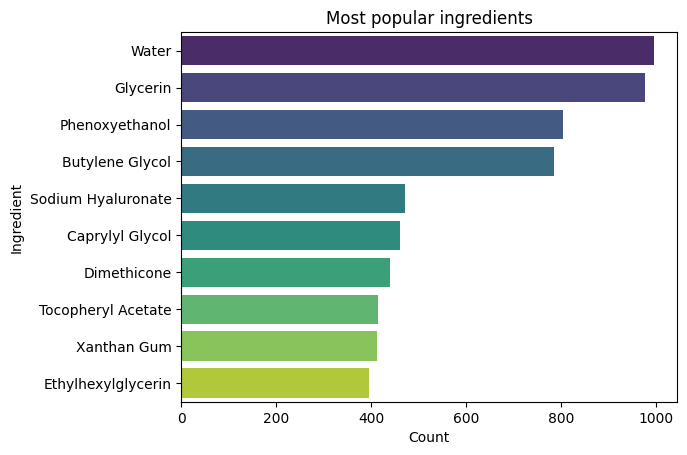

In [122]:
top_ingred = ingred_list.head(10)
sns.barplot(x=top_ingred.values, y=top_ingred.index, palette='viridis' , legend=False)
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.title('Most popular ingredients')
plt.show()

##### Top 10 ingredients across categories

C:\Users\jillh\AppData\Local\Temp\ipykernel_38164\2420756359.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='viridis', legend=False)


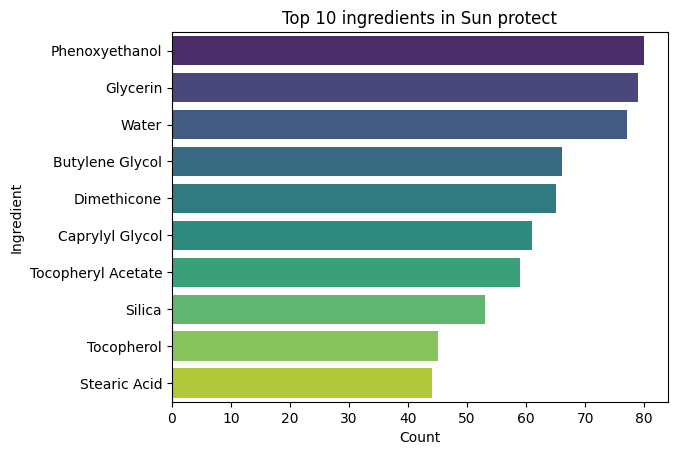

C:\Users\jillh\AppData\Local\Temp\ipykernel_38164\2420756359.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='viridis', legend=False)


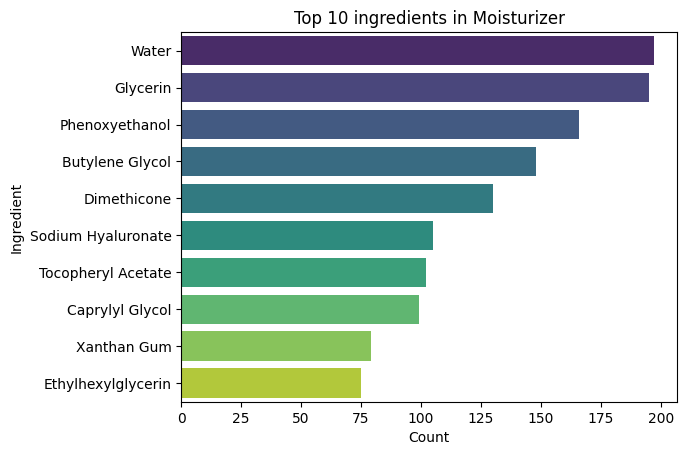

C:\Users\jillh\AppData\Local\Temp\ipykernel_38164\2420756359.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='viridis', legend=False)


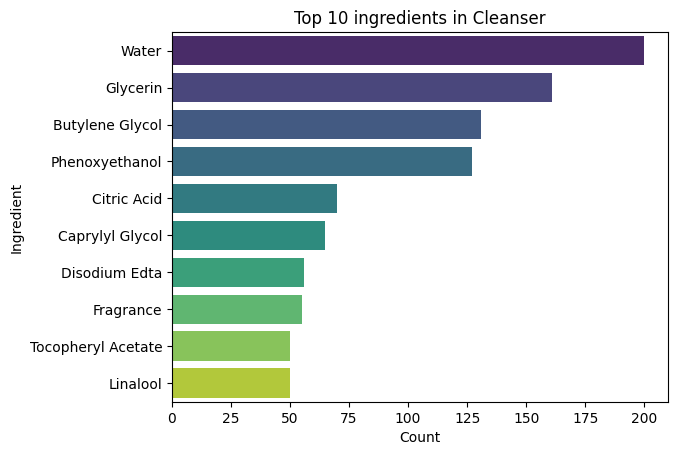

C:\Users\jillh\AppData\Local\Temp\ipykernel_38164\2420756359.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='viridis', legend=False)


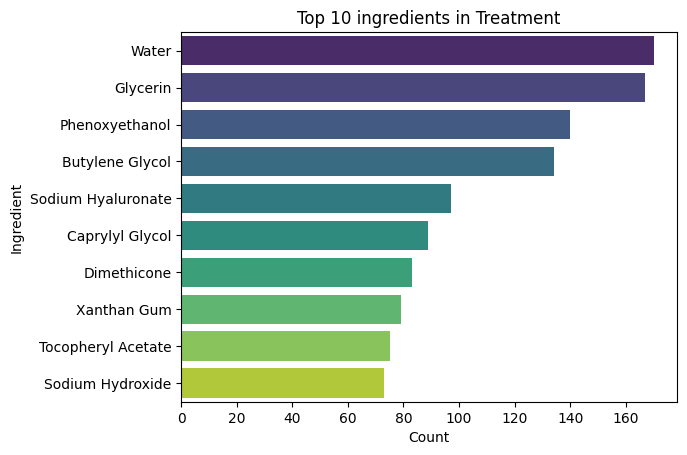

C:\Users\jillh\AppData\Local\Temp\ipykernel_38164\2420756359.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='viridis', legend=False)


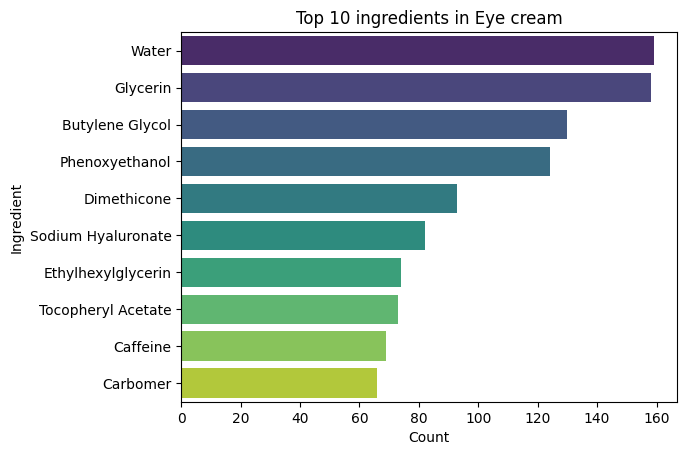

C:\Users\jillh\AppData\Local\Temp\ipykernel_38164\2420756359.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='viridis', legend=False)


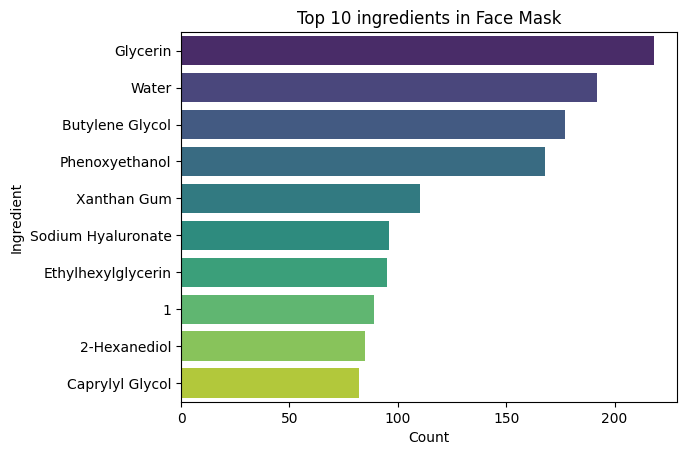

In [134]:
categories = {'Cleanser', 'Eye cream', 'Face Mask', 'Moisturizer', 'Sun protect', 'Treatment'}

for i in categories:
    # create copies so the original dataframe is not affected
    cat_list = sephora_prod[sephora_prod['category'] == i].copy()
    
    # repeat the split
    cat_list['split_ingred'] = cat_list['ingredients'].str.split(',')
    
    # then explode
    exploded_list = cat_list.explode('split_ingred')
    
    # then strip empty spaces
    exploded_list['split_ingred'] = exploded_list['split_ingred'].str.strip()
    
    # then value count
    ingred_list = exploded_list['split_ingred'].value_counts()

    # top 10 ingredients of each category
    top_10 = ingred_list.head(10)
    
    sns.barplot(x=top_10.values, y=top_10.index, palette='viridis', legend=False)
    plt.xlabel('Count')
    plt.ylabel('Ingredient')
    plt.title(f'Top 10 ingredients in {i}')
    plt.show()


#### Matching ingredients to products

In [209]:
sephora_exploded = sephora_prod.explode('ingredients')
sephora_exploded

#merged_data = sephora_exploded.merge(ingredients, left_on='ingredients', right_on='name', how='left')
#merged_data

,category,brand,name,price,rating,ingredients,combination,dry,normal,oily,sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolatum, Glycerin, Isohexadecane, Microcrystalline Wax, Lanolin Alcohol, Citrus Aurantifolia (Lime) Extract, Sesamum Indicum (Sesame) Seed Oil, Eucalyptus Globulus (Eucalyptus) Leaf Oil, Sesamum Indicum (Sesame) Seed Powder, Medicago Sativa (Alfalfa) Seed Powder, Helianthus Annuus (Sunflower) Seedcake, Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal, Sodium Gluconate, Copper Gluconate, Calcium Gluconate, Magnesium Gluconate, Zinc Gluconate, Magnesium Sulfate, Paraffin, Tocopheryl Succinate, Niacin, Water, Beta-Carotene, Decyl Oleate, Aluminum Distearate, Octyldodecanol, Citric Acid, Cyanocobalamin, Magnesium Stearate, Panthenol, Limonene, Geraniol, Linalool, Hydroxycitronellal, Citronellol, Benzyl Salicylate, Citral, Sodium Benzoate, Alcohol Denat., Fragrance.",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butylene Glycol, Pentylene Glycol, Water, Sodium Benzoate, Methylparaben, Sorbic Acid.",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Cetearyl Alcohol, Cetearyl Olivate, Sorbitan Olivate, Sclerocarya Birrea Seed Oil, Bacillus/Soybean/ Folic Acid Ferment Extract, Nymphaea Alba Root Extract, sh-Oligopeptide-1, sh-Oligopeptide-2, sh-Polypeptide-1, sh-Polypeptide-9, sh-Polypeptide-11, Copper Palmitoyl Heptapeptide-14, Heptapeptide-15 Palmitate, Palmitoyl Tetrapeptide-7, Palmitoyl Tripeptide-1, Alanine, Arginine, Glycine, Histidine, Isoleucine, Phenylalanine, Proline, Serine, Threonine, Valine, Acetyl Glutamine, Coconut Alkanes , Coco-Caprylate/Caprate, Sodium Hyaluronate, Aspartic Acid, Linoleic Acid, Linolenic Acid, Lecithin, Butylene Glycol, Polyvinyl Alcohol, Sodium Lactate, Sodium PCA, PCA, Sorbitan Isostearate, Carbomer, Polysorbate 20, Polysorbate 60, Lactic Acid/Glycolic Acid Copolymer, Hydroxyethyl Acrylate/Sodium Acryloyldimethyl Taurate Copolymer, Xanthan Gum, Isomalt, 1,2-Hexanediol, Caprylyl Glycol, Chlorphenesin, Phenoxyethanol, Tocopherol, Sodium Benzoate, Phenylpropanol, Glyceryl Caprylate, Symphytum Officinale Callus Culture Extract.",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, Petrolatum, Glyceryl Distearate, Phenyl Trimethicone, Butylene Glycol, Hydrogenated Vegetable Oil, Cholesterol, Butyrospermum Parkii (Shea Butter), Steareth-10, Dimethicone, Glyceryl Stearate Se, Polysilicone-11, Sesamum Indicum (Sesame) Seed Oil, Medicago Sativa (Alfalfa) Seed Powder, Helianthus Annuus (Sunflower) Seedcake, Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal, Eucalyptus Globulus (Eucalyptus) Leaf Oil, Sodium Gluconate, Copper Gluconate, Calcium Gluconate, Magnesium Gluconate, Zinc Gluconate, Tocopheryl Succinate, Niacin, Sesamum Indicum (Sesame) Seed Powder, Water, Citrus Aurantifolia (Lime) Peel Extract, Laminaria Digitata Extract, Crithmum Maritimum Extract, Salicornia Herbacea Extract, Plankton Extract, Chlorella Vulgaris Extract, Glycine Soja (Soybean) Seed Extract, Glycerin, Caffeine, Sea Salt/Maris Sal/Sel Marin, Micrococcus Lysate, Diethylhexyl Succinate, Adenosine Phosphate, Creatine, Hydrolyzed Algin, Isocetyl Stearoyl Stearate, Cetyl Alcohol, Sucrose, Acetyl Hexapeptide-8, Glucose Oxidase, Polyacrylamide, Acetyl Carnitine Hcl, Glucose, Caprylic/Capric Triglyceride, C13-14 Isoparaffin, Tocopheryl Acetate, Tetrahexyldecyl Ascorbate, Sodium Pca, Glycosaminoglycans, Urea, Distearyldimonium Chloride, Dipalmitoyl Hydroxyproline, Sodium Hyaluronate, Laureth-7, Lecithin, Trehalose, Polyquaternium-51, Lactoperoxidase, Hydroxypropyl Cyclodextrin, Cyanocobalamin, Pentylene Glycol, Fragrance, Disodium Edta, Bht, Citronellol, Hydroxycitronellal, Geraniol, Linalool, Limonene, Potassium Sorbate, Phenoxyethanol",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ C

#### Interactive App

In [199]:
ingredients

,name,short_description,what_is_it,what_does_it_do,who_is_it_good_for,who_should_avoid,url
0,Alpha-Glucan Oligosaccharide,"Alpha-glucan oligosaccharide is in a class of prebiotic ingredients also found on ingredients lists as Fructooligosaccharides, lactobacillus extract filtrate, rhamnose and saccharomyces cerevisiae (yeast) extract. Prebiotics are a class of ingredients which can be found on ingredients lists as fructooligosaccharides, lactobacillus extract filtrate, rhamnose and saccharomyces cerevisiae (yeast) extract.","Prebiotics are a type of non-digestible dietary fiber used in skincare products to support the skin's microbiome, which consists of beneficial bacteria that contribute to skin health.","Prebiotics offer benefits such as:- Help maintain a balanced and healthy skin microbiome by promoting the growth of beneficial bacteria.- Support the skin's natural defences against harmful microorganisms, contributing to overall skin health.- Enhance the skin's barrier function, reducing moisture loss and improving hydration.- Can have a calming effect on the skin, helping to soothe and alleviate inflammation and irritation.","[Acne, Blackheads, Redness, Pregnancy]",[Related Allergy],https://renude.co/ingredients/alpha-glucan-oligosaccharide
1,Aloe Vera,"Aloe vera, also appear on ingredients lists as aloe barbadensis (aloe vera) leaf juice, contains around 75 active constituents, including Vitamins A,C & E to provide antioxidant protection, 8 enzymes to inhibit inflammatory processes in the body and 9 different minerals to support the body’s natural functioning. It also includes sugars to provide hydrating humectant properties, fatty acids to provide anti-inflammatory & antiseptic properties, and hormones to promote wound healing.","Aloe vera is a skincare ingredient derived from the gel-like substance found inside the leaves of the aloe vera plant. It is used to soothe and hydrate the skin, and to promote overall skin health.","Aloe vera offers multiple benefits for the skin. It helps to soothe and calm irritated or sunburned skin, reducing redness and discomfort. Aloe vera also provides hydration and moisture, promoting a plump and healthy-looking complexion. Additionally, it contains antioxidants that help protect the skin against environmental damage and premature aging.","[Dry and dehydrated skin, Impaired skin barrier, Radiance, Pregnancy, Texture]",[Related Allergy],https://renude.co/ingredients/aloe-vera
2,Allantoin,"Allantoin occurs naturally in the body, but can also be derived from the root of the Comfrey plant or Chamomile, or produced synthetically. It is used in skincare for its ability to promote wound healing and healthy tissue growth, helping in the production of collagen and elastin fibres. Allantoin has also been shown to have soothing and anti-irritant properties, which is thought to be down to its ability to form complexes with irritating agents, thus preventing them from activating inflammatory mechanisms within the skin.","Allantoin is a skincare ingredient derived from plants such as comfrey root. It is known for its ability to soothe and calm the skin, making it a popular choice in skincare products.","Allantoin is a calming, anti-inflammatory, and hydrating ingredient which promotes wound healing by stimulating fibroblasts in the dermis.","[Fine Lines, Impaired skin barrier, Redness, Pregnancy]",[Related Allergy],https://renude.co/ingredients/allantoin
3,Algin,"Algin, also known as sodium alginate, is a large sugar molecule/polysaccharide that is used as a gelling agent in cosmetics, and is derived from brown seaweed. It is used in cosmetics for its hydrating and soothing properties, and in formulations as a binding and thickening agent.It is in the class of Algae Extract which also include ahnfeltia concinna extract, alaria esculenta extract, algae exopolysaccharides, alteromonas ferment extract, ascophyllum nodosum extract, asparagopsis armata extract, chlorella protothecoides, chlorella vulgari

concerns = split and explode the who_is_it_good_for column

list of concerns in a drop down menu

select what concerns you have

checks for concern1 or concern2 or concern3

outputs all ordering from most relevant (benefitting more concerns in one)

when clicked, new page opens up with short description, what is it, what does it do

## Graphs

Get the number of different products in each brand. See who sells the most and who the least.

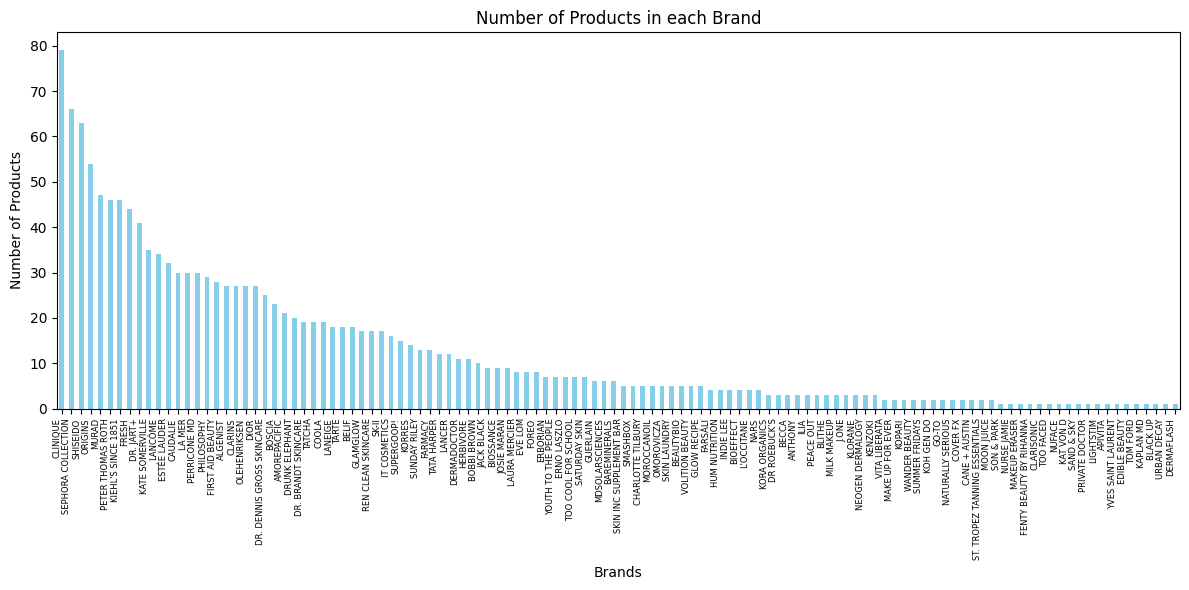

In [57]:
brand_count = sephora_prod['brand'].value_counts()

plt.figure(figsize=(12,6))
brand_count.plot(kind='bar', color='skyblue')
plt.title('Number of Products in each Brand')
plt.xlabel('Brands')
plt.ylabel('Number of Products')
plt.xticks(rotation=90, fontsize=6, ha='right')
plt.tight_layout()
plt.show()

Okay there are wayyy too many brands in the data. 

Turn it horizontally.

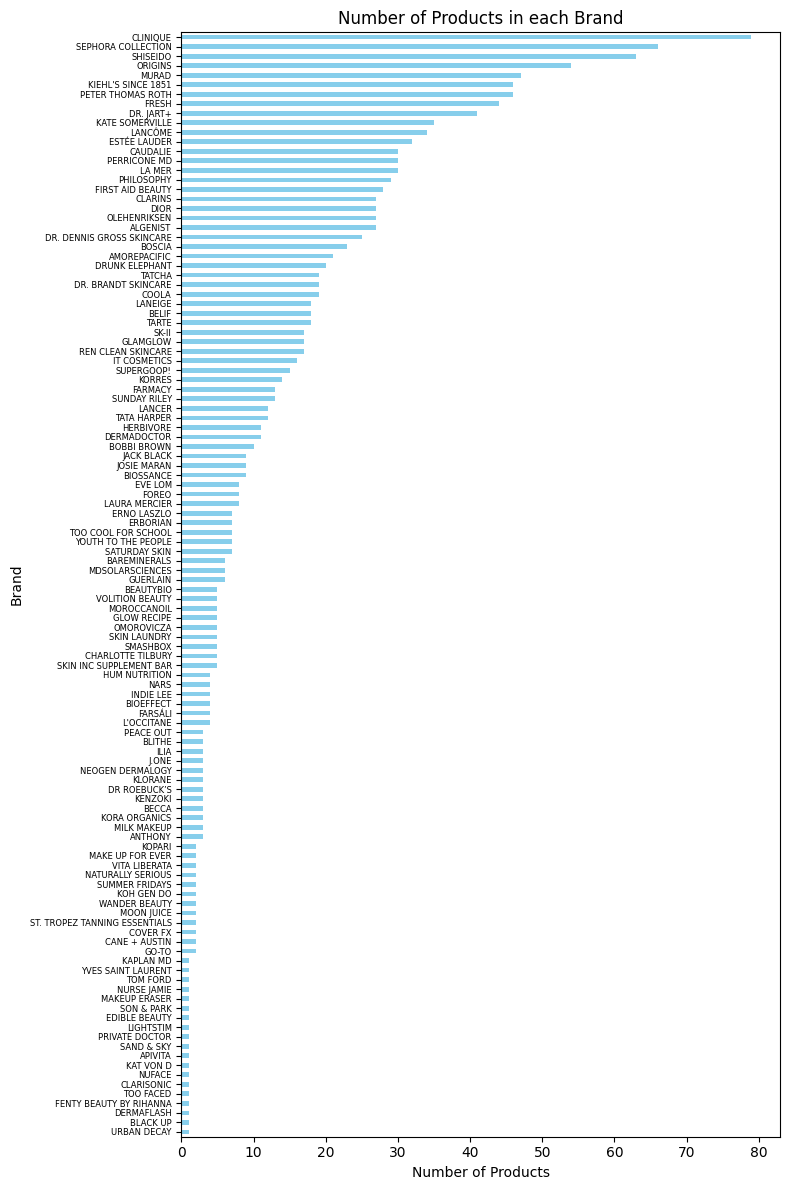

In [53]:
brand_count = sephora_prod['brand'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(8,12))
brand_count.plot(kind='barh', color='skyblue')
plt.title('Number of Products in each Brand')
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.yticks(fontsize=6)
plt.tight_layout()
plt.show()

#### Top 30 brands with the most products


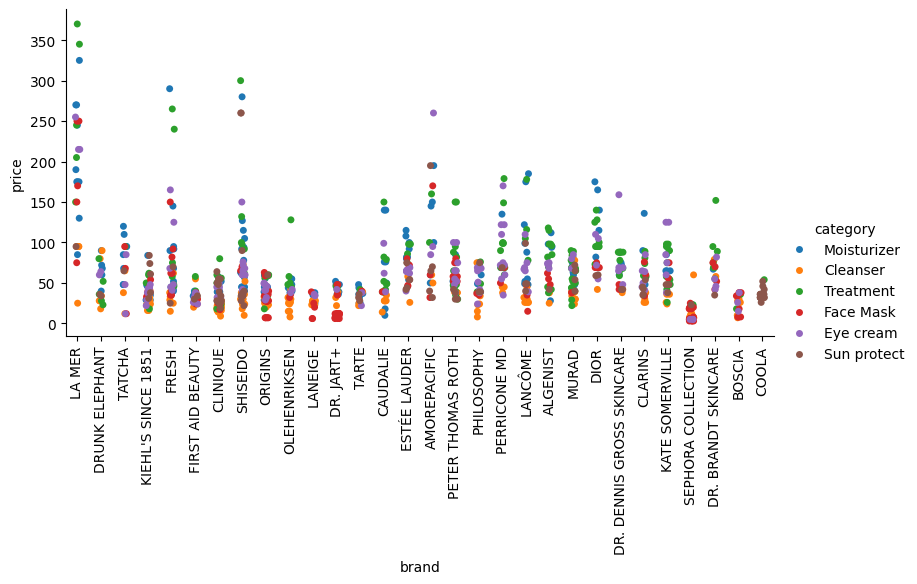

In [11]:
top_30 = sephora_prod['brand'].value_counts().index[:30]
filtered_top = sephora_prod[sephora_prod['brand'].isin(top_30)]
a = sns.catplot(x="brand", y='price', hue="category", data=filtered_top, kind="strip", height=4, aspect=2)
a.set_xticklabels(rotation=90)

#### Lowest 30 Brands with the least products

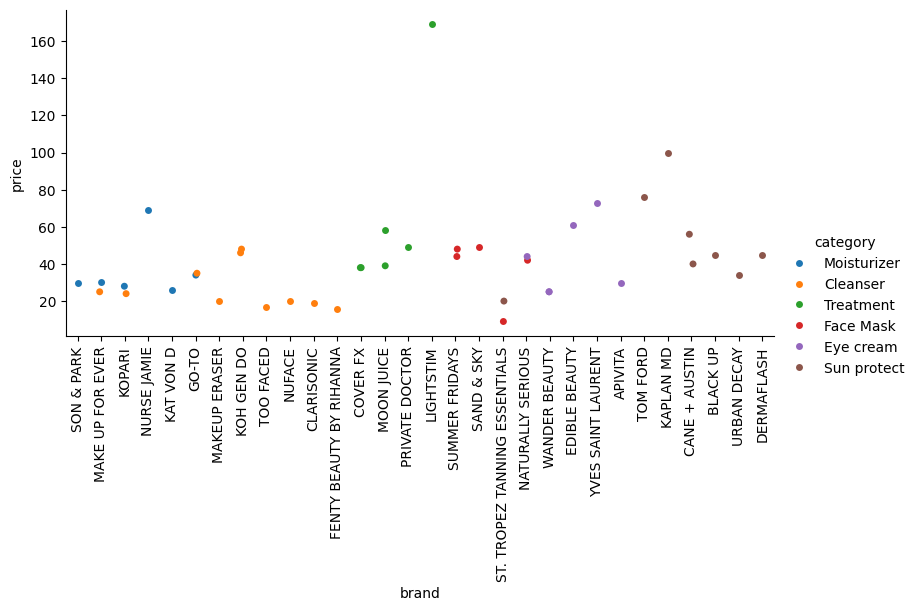

In [12]:
low_30 = sephora_prod['brand'].value_counts().index[-30:]
filtered_low = sephora_prod[sephora_prod['brand'].isin(low_30)]
b = sns.catplot(x='brand', y='price', hue='category', data=filtered_low, kind='strip', height=4, aspect=2)
b.set_xticklabels(rotation=90)

#### Rough Draft Dashboard (to be continued...)

In [ ]:
!pip install streamlit plotly
import streamlit as st
import plotly as px
